# Finding the best markets to advertise

There is an e-learning company that offers courses on programming. Most of the courses are on web and mobile development, but they also cover many other domains, like data science, game development, etc.

They get \\$59 subscription fee per month. They want to promote their product and they'd like to invest some money in advertisement. The goal of this project is to find out the two best markets to advertise the product in.

## Read and explore data

To reach our goal, we could organize surveys for a couple of different markets to find out which would be the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search for existing data that might be relevant for our purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

Lets's read the data and find the relevant columns.

In [1]:
import pandas as pd
pd.options.display.max_columns = None # To see all the columns
fcc = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory=False)

In [2]:
# Figure out the number of rows and columns
fcc.shape

(18175, 136)

In [3]:
# Show the fist five rows
fcc.head(5)

Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  CodeEventGameJam  \
0                   NaN                   NaN           NaN               NaN   
1                   NaN                   NaN           NaN               NaN   
2                   NaN                   NaN           NaN               NaN   
3                   NaN                   NaN           NaN               NaN   
4                   NaN                   NaN           NaN               NaN   

   CodeEventGirlDev  CodeEventHackathons  CodeEventMeetup  \
0               NaN                  NaN              NaN   
1               NaN                  NaN              NaN   
2               NaN                  1.0              NaN   
3               NaN                  NaN              NaN   
4               NaN                  NaN              NaN   

   CodeEventNodeSchool  CodeEventNone CodeEventOther  CodeEventRailsBridge  \
0                  NaN            NaN            NaN                   NaN   
1                  NaN            NaN            NaN                   NaN   
2                  1.0            NaN            NaN                   NaN   
3                  NaN            NaN            NaN                   NaN   
4                  NaN            NaN            NaN                   NaN   

   CodeEventRailsGirls  CodeEventStartUpWknd  CodeEventWkdBootcamps  \
0                  NaN                   NaN                    NaN   
1                  NaN                   NaN                    NaN   
2                  NaN                   NaN                    NaN   
3                  NaN                   NaN                    NaN   
4                  NaN                   NaN                    NaN   

   CodeEventWomenCode  CodeEventWorkshops       CommuteTime  \
0                 NaN                 NaN  15 to 29 minutes   
1                 NaN                 NaN               NaN   
2                 NaN                 NaN  15 to 29 minutes   
3                 NaN                 NaN  I work from home   
4                 NaN                 NaN               NaN   

             CountryCitizen               CountryLive  \
0                    Canada                    Canada   
1  United States of America  United States of America   
2  United States of America  United States of America   
3                    Brazil                    Brazil   
4                  Portugal                  Portugal   

               EmploymentField EmploymentFieldOther  \
0  software development and IT                  NaN   
1                          NaN                  NaN   
2  software development and IT                  NaN   
3  software development and IT                  NaN   
4                          NaN                  NaN   

                   EmploymentStatus EmploymentStatusOther  ExpectedEarning  \
0                Employed for wages                   NaN              NaN   
1  Not working but looking for work                   NaN          35000.0   
2                Employed for wages                   NaN          70000.0   

In [4]:
# Get the list of all columns names
fcc.columns.tolist()

['Age',
 'AttendedBootcamp',
 'BootcampFinish',
 'BootcampLoanYesNo',
 'BootcampName',
 'BootcampRecommend',
 'ChildrenNumber',
 'CityPopulation',
 'CodeEventConferences',
 'CodeEventDjangoGirls',
 'CodeEventFCC',
 'CodeEventGameJam',
 'CodeEventGirlDev',
 'CodeEventHackathons',
 'CodeEventMeetup',
 'CodeEventNodeSchool',
 'CodeEventNone',
 'CodeEventOther',
 'CodeEventRailsBridge',
 'CodeEventRailsGirls',
 'CodeEventStartUpWknd',
 'CodeEventWkdBootcamps',
 'CodeEventWomenCode',
 'CodeEventWorkshops',
 'CommuteTime',
 'CountryCitizen',
 'CountryLive',
 'EmploymentField',
 'EmploymentFieldOther',
 'EmploymentStatus',
 'EmploymentStatusOther',
 'ExpectedEarning',
 'FinanciallySupporting',
 'FirstDevJob',
 'Gender',
 'GenderOther',
 'HasChildren',
 'HasDebt',
 'HasFinancialDependents',
 'HasHighSpdInternet',
 'HasHomeMortgage',
 'HasServedInMilitary',
 'HasStudentDebt',
 'HomeMortgageOwe',
 'HoursLearning',
 'ID.x',
 'ID.y',
 'Income',
 'IsEthnicMinority',
 'IsReceiveDisabilitiesBenefits'

The most relevant columns for this project seems to be:

- CountryLive
- JobRoleInterest
- MoneyForLearning
- MonthsProgramming
- AttendedBootcamp

## Analyze the sample data

As mentioned earlier, most of the courses we are interested in are on the web and mobile development, but we also looking for other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located?
- What are the locations with the greatest number of new coders?
- How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

Looking at the columns, there is a column called JobRoleInterest describes for every participant the role(s) they'd be interested in working. I am going to generate a frequency distribution table for this column and find out if the subjects of this project mentioned there.

In [31]:
(fcc['JobRoleInterest'].value_counts(
    normalize = True, dropna = False)*100)

Full-Stack Web Developer                                                                                                                                                                       11.799742
  Front-End Web Developer                                                                                                                                                                       6.423052
  Data Scientist                                                                                                                                                                                2.189311
Back-End Web Developer                                                                                                                                                                          1.996137
Game Developer                                                                                                                                                                                  1.62

Looking at the above frequency distribution table, it seems people mostly are interested in more than one subject. There are a lot of people who are interested in web development or a combination of the web development with other related subjects. There are a few people who are interested in mobile programming and there are a few people who are interested in other domains.

The focus of our courses is on web and mobile development but we are also interested in Data Science, Game development, etc. Since these categories are mostly related and a combination of some of them can be seen in the above table, this sample seems representative.

Let's see how many people are interested in at least one these two main subjects: **web** and **mobile development**

In [6]:
has_web_mobile = fcc['JobRoleInterest'].str.contains(
    "web develop|mobile develop", 
    regex = True, 
    case = False).value_counts(dropna = False)
has_web_mobile

True     11183
True      6033
False      959
Name: JobRoleInterest, dtype: int64

Text(0.5, 1.07, 'Job Role Interests')

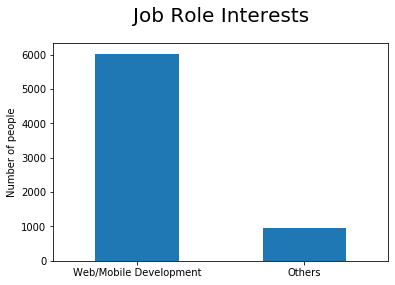

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
has_web_mobile = fcc['JobRoleInterest'].str.contains(
    "web develop|mobile develop", 
    regex = True, 
    case = False).value_counts()
has_web_mobile.plot.bar(rot = 0)
plt.xticks([0, 1], ['Web/Mobile Development', 'Others'])
plt.ylabel('Number of people')
plt.title('Job Role Interests',  y = 1.07, fontdict={'fontsize':20})

About 61% of people did not answer JbRoleInterest. From those who answer JobRoleInterest, 6033 people (about 86%) has mentioned at least one of these two objects. This sample contains lots of data about people who are interested in working in the field of web or mobile development so the sample has the right categories of people for our purpose.

## Analysis
Now I can start with finding out where the new coders are located, and what are the densities (how many coders there are) for each location.
There are two columns that contain location: **CountryCitizen** and **CountryLive**. For this analysis, I will work with CountryLive variable because I am interested where people are located, not where they were born.

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. 

I am going to drop all rows where participants did not answer what role they are interested in because these rows are not helpful to find out the number of potential customers and then look at the frequency table.

In [8]:
# Drop Nan values of JobRoleInterest
fcc = fcc[fcc['JobRoleInterest'].notna()]
fcc.shape

(6992, 136)

In [9]:
fcc['CountryLive'].value_counts()

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
                            ... 
Gambia                         1
Samoa                          1
Jordan                         1
Rwanda                         1
Yemen                          1
Name: CountryLive, Length: 137, dtype: int64

Here we can look at the frequency table in percentages and remove the countries with 0%.

In [10]:
per_dev_inst = (round(fcc['CountryLive'].value_counts(normalize = True)*100, 0)).astype(int)
per_dev_inst = per_dev_inst[per_dev_inst>0]
per_dev_inst

United States of America         46
India                             8
United Kingdom                    5
Canada                            4
Poland                            2
Brazil                            2
Germany                           2
Australia                         2
Russia                            1
Ukraine                           1
Nigeria                           1
Spain                             1
France                            1
Romania                           1
Netherlands (Holland, Europe)     1
Italy                             1
Philippines                       1
Serbia                            1
Greece                            1
Ireland                           1
South Africa                      1
Mexico                            1
Turkey                            1
Name: CountryLive, dtype: int32

46 percents of participants live in the US. With a big difference, India allocates 8 percent of the participants. The United Kingdom and Canada are the two countries after India. These are the four countries that show the highest potential for advertisement.

## How much money are new coders willing to spend on learning?

To figure out the markets for the advertisements, it is also helpful to find out how much money the new coders are actually willing to spend on learning. 

The **MoneyForLearning** column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. 

It is also helpful if we narrow the locations to the four countries we selected in the previous section: The USA, India, United Kingdom, and Canada.

### Create a new column 

I am going to create a new column that describes the amount of money a student has spent per month (at the moment they completed the survey).

I need to divide the **MoneyForLearning** column to the **MonthsProgramming** column to create the new column.

Some students answered that they had been learning to code for 0 months (it might be that they had just started when they completed the survey). To avoid dividing by 0, I replace all the values of 0 with 1.

In [11]:
fcc['MonthsProgramming'].replace(0, 1, inplace = True)

In [12]:
fcc['MoneyPerMonth'] = fcc['MoneyForLearning']/fcc['MonthsProgramming']

In [13]:
print("Number of null values in MoneyPerMonth column:\n**************")
sum(fcc['MoneyPerMonth'].isnull())

Number of null values in MoneyPerMonth column:
**************


675

In [14]:
# Remove null values from MoneyPerMonth column:
fcc = fcc[fcc['MoneyPerMonth'].notna()]
print("Number of null values in MoneyPerMonth column:\n**************")
sum(fcc['MoneyPerMonth'].isnull())

Number of null values in MoneyPerMonth column:
**************


0

In [15]:
# Remove null values from CountryLive column:
fcc = fcc[fcc['CountryLive'].notna()]

Let's show the mean number of participants for each of the four countries.

Mean of MoneyPerMonth
******************
CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64


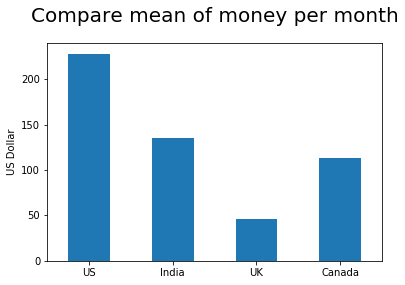

In [16]:
countries = ['United States of America', 'India', 'United Kingdom', 'Canada']
def show_mean_4(data, countries):
    group_by = data.groupby('CountryLive')['MoneyPerMonth']
    countries_mean = group_by.mean().loc[countries]
    print('Mean of MoneyPerMonth\n******************')
    print(countries_mean)
    
    countries_mean.plot.bar(rot = 0)
    plt.xticks([0, 1, 2, 3], ['US', 'India', 'UK', 'Canada'])
    plt.ylabel('US Dollar')
    plt.xlabel('')
    plt.title('Compare mean of money per month',  y = 1.07, fontdict={'fontsize':20})

    pass
show_mean_4(fcc, countries)    

According to the mean values of these countries, India has a greater mean than the United Kingdom and Canada. Based on a few socio-economical metrics of these countries, people in Canada and the United Kingdom pay for learning more than India so let's see why our result is different.

It might be that we don't have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

## Determine Outliers

Let's draw the boxplot for the four countries we are focusing on and find out if there are any outliers.

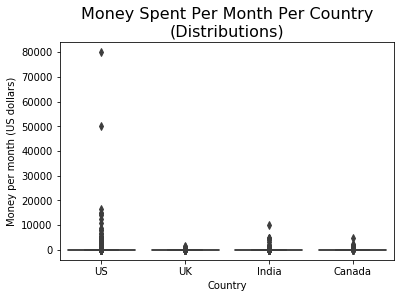

In [17]:
#Isolate the participants from the four countries we are focusing on
fcc_4 = fcc[fcc['CountryLive'].isin(countries)]

#remove future deprecation warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#Draw Boxplot
def draw_boxplots(data):
    import seaborn as sns
    sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive',
                data = data)
    plt.title('Money Spent Per Month Per Country\n(Distributions)',
             fontsize = 16)
    plt.ylabel('Money per month (US dollars)')
    plt.xlabel('Country')
    plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
    plt.show()
    pass
draw_boxplots(fcc_4)


According to the above plot, Us has some extremely large outliers. Let's isolate the participants who can pas less than 20000 per month.  

In [18]:
#Isolate the participants who pay less than 20000 per month
fcc_4 = fcc_4[fcc_4['MoneyPerMonth'] < 20000]

I am going to recompute the means and also draw the boxplots again.

Mean of MoneyPerMonth
******************
CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64


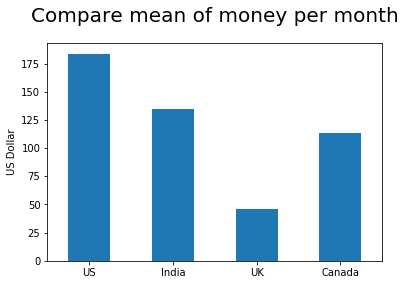

In [19]:
show_mean_4(fcc_4, countries)

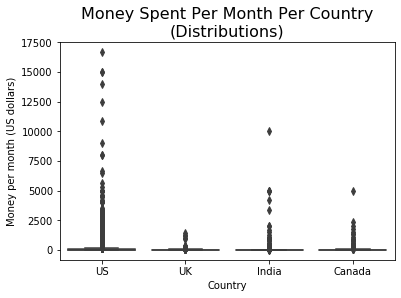

In [20]:
draw_boxplots(fcc_4)

Let's look at the outliers of India and Canada and see if they are good data. They may attend multiple boot camps so because of that the amount of money is so high. 

In [21]:
india_outliers = fcc_4[
    (fcc_4['MoneyPerMonth'] > 2500) & 
    (fcc_4['CountryLive'] == 'India')]
india_outliers

Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
1728   24.0               0.0             NaN                NaN          NaN   
1755   20.0               0.0             NaN                NaN          NaN   
7989   28.0               0.0             NaN                NaN          NaN   
8126   22.0               0.0             NaN                NaN          NaN   
13398  19.0               0.0             NaN                NaN          NaN   
15587  27.0               0.0             NaN                NaN          NaN   

       BootcampRecommend  ChildrenNumber                 CityPopulation  \
1728                 NaN             NaN  between 100,000 and 1 million   
1755                 NaN             NaN            more than 1 million   
7989                 NaN             NaN  between 100,000 and 1 million   
8126                 NaN             NaN            more than 1 million   
13398                NaN             NaN            more than 1 million   
15587                NaN             NaN            more than 1 million   

       CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  \
1728                    NaN                   NaN           NaN   
1755                    NaN                   NaN           1.0   
7989                    1.0                   NaN           NaN   
8126                    NaN                   NaN           NaN   
13398                   NaN                   NaN           NaN   
15587                   NaN                   NaN           NaN   

       CodeEventGameJam  CodeEventGirlDev  CodeEventHackathons  \
1728                1.0               NaN                  NaN   
1755                NaN               NaN                  1.0   
7989                NaN               NaN                  NaN   
8126                1.0               NaN                  1.0   
13398               NaN               NaN                  NaN   
15587               NaN               NaN                  1.0   

       CodeEventMeetup  CodeEventNodeSchool  CodeEventNone CodeEventOther  \
1728               NaN                  NaN            NaN            NaN   
1755               1.0                  NaN            NaN            NaN   
7989               NaN                  NaN            NaN            NaN   
8126               NaN                  NaN            NaN            NaN   
13398              NaN                  NaN            1.0            NaN   
15587              NaN                  NaN            NaN            NaN   

       CodeEventRailsBridge  CodeEventRailsGirls  CodeEventStartUpWknd  \
1728                    NaN                  NaN                   NaN   
1755                    NaN                  NaN                   NaN   
7989                    NaN                  NaN                   NaN   
8126                    NaN                  NaN                   NaN   
13398                   NaN                  NaN                   NaN   
15587                   NaN                  NaN                   NaN   

       CodeEventWkdBootcamps  CodeEventWomenCode  CodeEventWorkshops  \
1728                     NaN                 NaN                 NaN   
1755                     NaN                 NaN                 NaN   
7989                     NaN                 NaN                 1.0   
8126                     NaN                 NaN                 NaN   
13398                    NaN                 NaN                 NaN   
15587                    NaN                 NaN                 NaN   

            CommuteTime CountryCitizen CountryLive  \
1728                NaN          India       India   
1755                NaN          India       India   
7989   15 to 29 minutes          India       India   
8126                NaN          India       India   
13398               NaN          India       India   
15587  15 to 29 minutes          India       India   

                   EmploymentField Emp

We can see that neither of them attended boot camps so they may be students and the amount of money they mentioned maybe the university tuition fees although the survey has asked them to exclude the university fees they might not pay attention and include it. I am going to remove these outliers from our sample.

In [22]:
# Remove the outliers from India
fcc_4 = fcc_4.drop(india_outliers.index)

Looking at the boxplots above, the US has more outliers (over $6000 per month). Let's look at them closely.

In [23]:
us_outliers = fcc_4[
    (fcc_4['CountryLive'] == 'United States of America') & 
    (fcc_4['MoneyPerMonth'] >= 6000)]

us_outliers

Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo  \
718    26.0               1.0             0.0                0.0   
1222   32.0               1.0             0.0                0.0   
3184   34.0               1.0             1.0                0.0   
3930   31.0               0.0             NaN                NaN   
6805   46.0               1.0             1.0                1.0   
7198   32.0               0.0             NaN                NaN   
7505   26.0               1.0             0.0                1.0   
9778   33.0               1.0             0.0                1.0   
16650  29.0               0.0             NaN                NaN   
16997  27.0               0.0             NaN                NaN   
17231  50.0               0.0             NaN                NaN   

                                 BootcampName  BootcampRecommend  \
718    The Coding Boot Camp at UCLA Extension                1.0   
1222                            The Iron Yard                1.0   
3184                           We Can Code IT                1.0   
3930                                      NaN                NaN   
6805                                 Sabio.la                0.0   
7198                                      NaN                NaN   
7505                                   Codeup                0.0   
9778                             Grand Circus                1.0   
16650                                     NaN                NaN   
16997                                     NaN                NaN   
17231                                     NaN                NaN   

       ChildrenNumber                 CityPopulation  CodeEventConferences  \
718               NaN            more than 1 million                   1.0   
1222              NaN  between 100,000 and 1 million                   NaN   
3184              NaN            more than 1 million                   NaN   
3930              NaN  between 100,000 and 1 million                   NaN   
6805              NaN  between 100,000 and 1 million                   NaN   
7198              NaN            more than 1 million                   1.0   
7505              NaN            more than 1 million                   NaN   
9778              NaN  between 100,000 and 1 million                   NaN   
16650             2.0            more than 1 million                   NaN   
16997             1.0            more than 1 million                   NaN   
17231             2.0              less than 100,000                   NaN   

       CodeEventDjangoGirls  CodeEventFCC  CodeEventGameJam  CodeEventGirlDev  \
718                     NaN           NaN               NaN               NaN   
1222                    NaN           NaN               NaN               NaN   
3184                    NaN           NaN               NaN               NaN   
3930                    NaN           NaN               NaN               NaN   
6805                    NaN           NaN               NaN               NaN   
7198                    NaN           NaN               NaN               NaN   
7505                    NaN           NaN               NaN               NaN   
9778                    NaN           NaN               NaN               NaN   
16650                   NaN           NaN               NaN               NaN   
16997                   NaN           NaN               NaN               NaN   
17231                   NaN           NaN               NaN               NaN   

       CodeEventHackathons  CodeEventMeetup  CodeEventNodeSchool  \
718                    NaN              NaN                  NaN   
1222                   NaN              1.0                  NaN   
3184                   NaN              1.0                  NaN   
3930                   NaN              NaN                  NaN   
6805                   NaN              NaN                  NaN   
7198                   NaN              1.0             

For the above outliers, those that do not attend the boot camps can be removed. Those that attended the boot camps but have less than 3 months' programming experience can also be removed, it seems they attend a boot camp, paid a large amount of money at the beginning and after that, they won't probably pay monthly for learning.

In [24]:
# Remove the respondents who didn't attendent a bootcamp
no_bootcamp = fcc_4[
    (fcc_4['CountryLive'] == 'United States of America') & 
    (fcc_4['MoneyPerMonth'] >= 6000) &
    (fcc_4['AttendedBootcamp'] == 0)
]

fcc_4 = fcc_4.drop(no_bootcamp.index)


# Remove the respondents that had been programming for less than 3 months
less_than_3_months = fcc_4[
    (fcc_4['CountryLive'] == 'United States of America') & 
    (fcc_4['MoneyPerMonth'] >= 6000) &
    (fcc_4['MonthsProgramming'] <= 3)
]

fcc_4 = fcc_4.drop(less_than_3_months.index)

Now, Let's examine the outliners of Canada (more than $4000) as well.

In [25]:
canada_outliers = fcc_4[
    (fcc_4['CountryLive'] == 'Canada') & 
    (fcc_4['MoneyPerMonth'] >= 4000)]

canada_outliers

Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
13659  24.0               1.0             0.0                0.0      Bloc.io   

       BootcampRecommend  ChildrenNumber       CityPopulation  \
13659                1.0             NaN  more than 1 million   

       CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  \
13659                   1.0                   NaN           1.0   

       CodeEventGameJam  CodeEventGirlDev  CodeEventHackathons  \
13659               NaN               NaN                  NaN   

       CodeEventMeetup  CodeEventNodeSchool  CodeEventNone CodeEventOther  \
13659              1.0                  NaN            NaN            NaN   

       CodeEventRailsBridge  CodeEventRailsGirls  CodeEventStartUpWknd  \
13659                   NaN                  NaN                   NaN   

       CodeEventWkdBootcamps  CodeEventWomenCode  CodeEventWorkshops  \
13659                    NaN                 NaN                 1.0   

            CommuteTime CountryCitizen CountryLive EmploymentField  \
13659  30 to 44 minutes         Canada      Canada         finance   

      EmploymentFieldOther    EmploymentStatus EmploymentStatusOther  \
13659                  NaN  Employed for wages                   NaN   

       ExpectedEarning  FinanciallySupporting  FirstDevJob Gender GenderOther  \
13659          60000.0                    NaN          NaN   male         NaN   

       HasChildren  HasDebt  HasFinancialDependents  HasHighSpdInternet  \
13659          NaN      1.0                     0.0                 1.0   

       HasHomeMortgage  HasServedInMilitary  HasStudentDebt  HomeMortgageOwe  \
13659              1.0                  0.0             0.0         250000.0   

       HoursLearning                              ID.x  \
13659           10.0  739b584aef0541450c1f713b82025181   

                                   ID.y    Income  IsEthnicMinority  \
13659  28381a455ab25cc2a118d78af44d8749  140000.0               1.0   

       IsReceiveDisabilitiesBenefits  IsSoftwareDev  IsUnderEmployed  \
13659                            1.0            0.0              0.0   

            JobApplyWhen  JobInterestBackEnd  JobInterestDataEngr  \
13659  I haven't decided                 1.0                  NaN   

       JobInterestDataSci  JobInterestDevOps  JobInterestFrontEnd  \
13659                 1.0                NaN                  1.0   

       JobInterestFullStack  JobInterestGameDev  JobInterestInfoSec  \
13659                   1.0                 1.0                 NaN   

       JobInterestMobile JobInterestOther  JobInterestProjMngr  \
13659                1.0              NaN                  1.0   

       JobInterestQAEngr  JobInterestUX                               JobPref  \
13659                NaN            1.0  work for a multinational corporation   

       JobRelocateYesNo                                    JobRoleInterest  \
13659               NaN    Mobile Developer, Full-Stack Web Developer, ...   

      JobWherePref           LanguageAtHome          MaritalStatus  \
13659    from home  Yue (Cantonese) Chinese  single, never married   

       MoneyForLearning  MonthsProgramming   NetworkID         Part1EndTime  \
13659           10000.0                2.0  41c26f2932  2017-03-25 23:23:03   

            Part1StartTime         Part2EndTime       Part2StartTime  \
13659  2017-03-25 23:20:33  2017-03-25 23:24:34  2017-03-25 23:23:06   

       PodcastChangeLog  PodcastCodeNewbie  PodcastCodePen  PodcastDevTea  \
13659               NaN                NaN             NaN            NaN   

       PodcastDotNET  PodcastGiantRobots  PodcastJSAir  PodcastJSJabber  \
13659            NaN                 NaN           NaN              NaN   

       PodcastNone PodcastOther  PodcastProgThrowdown  PodcastRubyRogues  \
13659          1.0          NaN                   NaN                NaN   

       PodcastSEDaily  PodcastSERadio  PodcastShopTal

There is only one outlier who attended boot camp but the number of programming months is less than 3 which is similar to some of the outliners of the US and can be removed.

In [26]:
fcc_4 = fcc_4.drop(canada_outliers.index)

Let's recompute the means and generate the boxplots again.

Mean of MoneyPerMonth
******************
CountryLive
United States of America    142.654608
India                        65.758763
United Kingdom               45.534443
Canada                       93.065400
Name: MoneyPerMonth, dtype: float64


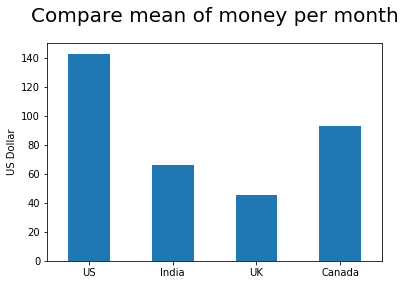

In [27]:
show_mean_4(fcc_4, countries)

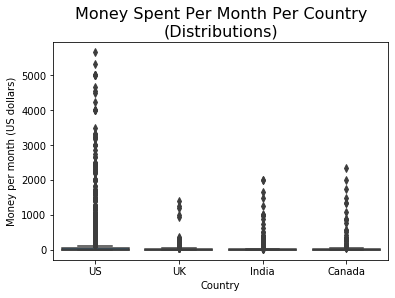

In [28]:
draw_boxplots(fcc_4)

## Choosing the final markets

Apparently the **USA** is the first market to advertise in. The number of participants and the money they want to spend on learning is significantly higher than the other countries.

Choosing the second country is not clear. The money that we expect each participant to spend for a month is \\$59 and there are two countries with the money per month higher than \\$59, Canada, and India. Each participant in Canada is willing to spend about \\$93 per month for learning which is higher than India (\\$65) but India has more potential customers. Let's look at the ratio of potential customers.

In [29]:
per_participants = fcc_4['CountryLive'].value_counts(normalize=True)*100
per_participants

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

Text(0.5, 1.07, 'Percent of the number of participants')

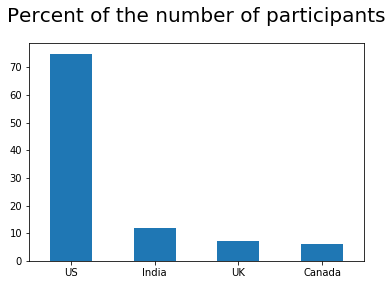

In [30]:
per_participants.plot.bar(rot = 0)
plt.xticks([0, 1, 2, 3], ['US', 'India', 'UK', 'Canada'])
plt.ylabel('')
plt.xlabel('')
plt.title('Percent of the number of participants',  y = 1.07, fontdict={'fontsize':20})

Either or both of Canada and India are reasonable to be chosen. It makes sense to split the advertising budget unequally because the number of potential customers is different in these countries.

There are three options for choosing the markets:
1. Choose only the USA
2. Choose two countries the USA and India or the USA and Canada with a ratio of 70% and 30% respectively.
3. Choose three countries: USA, India, and Canada with a ratio of 60%, 25%, and 15% respectively.

The United Kingdom is not the option since the amount of money per month that people are willing to spend on learning is less than what we expect.

At this point, it would be good to send our data and analysis to the marketing team. They might be able to do more surveys in Canada and India to get more data and figure out which country would be better to advertise in.

## Conclusion
In this project, we analyzed survey data to figure out what are the best two markets that we can advertise in. The only solid decision is the USA with a significantly large number of potential customers and the big amount of money they are willing to spend on learning per month.

For the second country it was not so clear which one to choose so our decision was to send the result to the marketing team for more investigation and probably survey.